In [1]:
import boto3, os, sagemaker
from sagemaker import get_execution_role

iam_role = get_execution_role()

my_region = boto3.Session().region_name

sm_session = sagemaker.session.Session(boto3.Session())

print("Success")

Success


In [4]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

adult = pd.read_csv("s3://adultdata/donor.txt", header=None, delimiter=r",\s+")
adult.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
cols = {
    "age": "continuous",
    "workclass": "Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked",
    "fnlwgt": "continuous",
    "education": "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool",
    "education-num": "continuous",
    "marital-status": "Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse",
    "occupation": "Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces",
    "relationship": "Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried",
    "race": "White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black",
    "sex": "Female, Male",
    "capital-gain": "continuous",
    "capital-loss": "continuous",
    "hours-per-week": "continuous",
    "native-country": "United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands",
    "income": ">50K, <=50K",
}

with open('cols_dict.pickle', 'wb') as f:
    pickle.dump(cols, f, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
cols_dict = pickle.load(open('cols_dict.pickle', 'rb'))

In [7]:
adult.columns = [cols for cols in cols_dict.keys()]

In [10]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
dtypes = {
    "age": int,
    "workclass": str,
    "fnlwgt": int,
    "education": str,
    "education-num": int,
    "marital-status": str,
    "occupation": str,
    "relationship": str,
    "race": str,
    "sex": str,
    "capital-gain": int,
    "capital-loss": int,
    "hours-per-week": int,
    "native-country": str,
    "income": str
}

adult = adult.astype(dtypes)

In [9]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [11]:
adult.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [13]:
for x in range(len(list(adult.columns))):
    print("{} number of missing values in column {}".format(sum((adult.iloc[:,x]).astype('str').str.contains('\?')), 
          list(adult.columns)[x]))

0 number of missing values in column age
1836 number of missing values in column workclass
0 number of missing values in column fnlwgt
0 number of missing values in column education
0 number of missing values in column education-num
0 number of missing values in column marital-status
1843 number of missing values in column occupation
0 number of missing values in column relationship
0 number of missing values in column race
0 number of missing values in column sex
0 number of missing values in column capital-gain
0 number of missing values in column capital-loss
0 number of missing values in column hours-per-week
583 number of missing values in column native-country
0 number of missing values in column income


Remove Missing values '?'

In [58]:
for x in range(len(list(adult.columns))):
    if sum((adult.iloc[:,x]).astype('str').str.contains('\?')) != 0:
        adult = adult[~adult.iloc[:,x].str.contains("\?")]

In [59]:
for x in range(len(list(adult.columns))):
    print("{} number of missing values in column {}".format(sum((adult.iloc[:,x]).astype('str').str.contains('\?')), 
          list(adult.columns)[x]))

0 number of missing values in column age
0 number of missing values in column workclass
0 number of missing values in column fnlwgt
0 number of missing values in column education
0 number of missing values in column education-num
0 number of missing values in column marital-status
0 number of missing values in column occupation
0 number of missing values in column relationship
0 number of missing values in column race
0 number of missing values in column sex
0 number of missing values in column capital-gain
0 number of missing values in column capital-loss
0 number of missing values in column hours-per-week
0 number of missing values in column native-country
0 number of missing values in column income


In [60]:
len(adult)

30162

# Random Forest Implementation

In [113]:
label = adult['income']
features = adult.drop(['income','fnlwgt'], axis = 1)

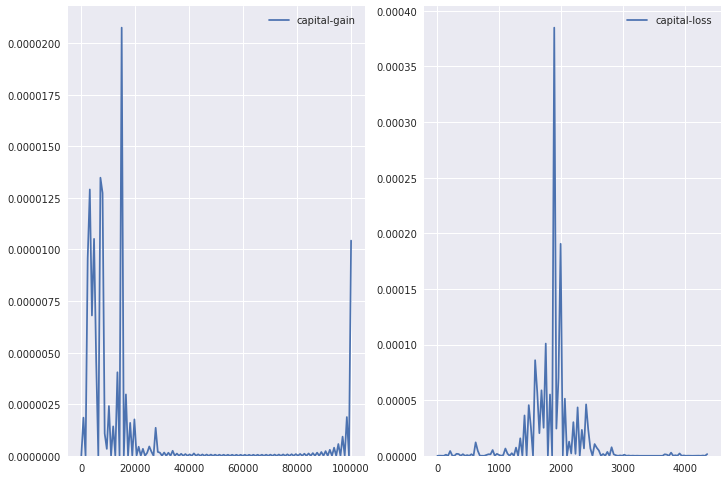

In [114]:
fig, axs = plt.subplots(ncols=2)
sns.kdeplot(features['capital-gain'], ax=axs[0])
sns.kdeplot(features['capital-loss'], ax=axs[1])
plt.show()

Taking log transform on these two features and incrementing values slightly to prevent log(0)

In [115]:
var = ['capital-gain', 'capital-loss']
features_new = pd.DataFrame(data = features)
features_new[var] = features[var].apply(lambda x: np.log(x + 1))

Convert the caterogical to one hot encoding

In [116]:
features_new = pd.get_dummies(features_new)

In [124]:
features_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.0,37.0,47.0,90.000000
education-num,30162.0,10.121312,2.549995,1.0,9.0,10.0,13.0,16.000000
capital-gain,30162.0,0.743647,2.470518,0.0,0.0,0.0,0.0,11.512925
capital-loss,30162.0,0.355226,1.595010,0.0,0.0,0.0,0.0,8.379539
hours-per-week,30162.0,40.931238,11.979984,1.0,40.0,40.0,45.0,99.000000
workclass_Federal-gov,30162.0,0.031265,0.174035,0.0,0.0,0.0,0.0,1.000000
workclass_Local-gov,30162.0,0.068530,0.252657,0.0,0.0,0.0,0.0,1.000000
workclass_Private,30162.0,0.738877,0.439254,0.0,0.0,1.0,1.0,1.000000
workclass_Self-emp-inc,30162.0,0.035608,0.185313,0.0,0.0,0.0,0.0,1.000000
workclass_Self-emp-not-inc,30162.0,0.082853,0.275664,0.0,0.0,0.0,0.0,1.000000


Split train and test first before scaling as it can lead to information leakage

In [117]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(features_new,label,test_size = 0.2,random_state = 1234)  

print("Training set has {} samples.".format(X_train.shape[0])) 
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 24129 samples.
Testing set has 6033 samples.


Scaling all numeric features in both datasets

In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)
numeric = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.fit_transform(X_test[numeric])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/ec2-u

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 a

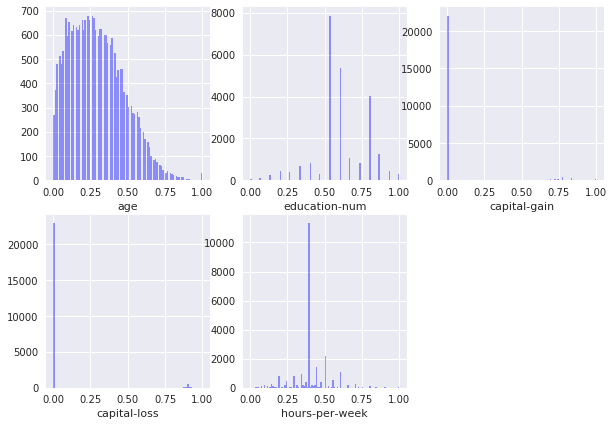

In [119]:
fig=plt.figure(figsize=(10,7))
columns = 3
rows = 2

for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    sns.distplot(X_train[numeric[i-1]], kde=False, bins=100, color="b")
plt.show()

In [122]:

y_train = y_train.map({'<=50K':0,'>50K':1})
y_test = y_test.map({'<=50K':0,'>50K':1})


In [125]:
X_train.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
5168,0.561644,0.533333,0.0,0.000000,0.500000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
27080,0.136986,0.533333,0.0,0.000000,0.448980,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32084,0.424658,0.266667,0.0,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
27153,0.219178,0.533333,0.0,0.000000,0.448980,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7452,0.493151,0.666667,0.0,0.871628,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [126]:
# Get feature names
features = X_train.columns

Upload train and test to S3

In [127]:
trainX = pd.DataFrame(X_train)
trainX['target'] = y_train

testX = pd.DataFrame(X_test)
testX['target'] = y_test

trainX.to_csv('train.csv')
testX.to_csv('test.csv')

In [128]:
bucket = "adultdata"

# send data to S3. SageMaker will take training data from s3
trainpath = sm_session.upload_data(
    path='train.csv', bucket=bucket,
    key_prefix='sagemaker/sklearncontainer')

testpath = sm_session.upload_data(
    path='test.csv', bucket=bucket,
    key_prefix='sagemaker/sklearncontainer')

## Write py script to train

In [134]:
%%writefile script.py

import argparse
import os

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib



# inference functions ---------------
def model_fn(model_dir):
    clf = joblib.load(os.path.join(model_dir, "model.joblib"))
    return clf



if __name__ =='__main__':

    print('extracting arguments')
    parser = argparse.ArgumentParser()

    # hyperparameters sent by the client are passed as command-line arguments to the script.
    # to simplify the demo we don't use all sklearn RandomForest hyperparameters
    parser.add_argument('--n-estimators', type=int, default=10)
    parser.add_argument('--min-samples-leaf', type=int, default=3)
    # Data, model, and output directories
    parser.add_argument('--model-dir', type=str, default=os.environ.get('SM_MODEL_DIR'))
    parser.add_argument('--train', type=str, default=os.environ.get('SM_CHANNEL_TRAIN'))
    parser.add_argument('--test', type=str, default=os.environ.get('SM_CHANNEL_TEST'))
    parser.add_argument('--train-file', type=str, default='train.csv')
    parser.add_argument('--test-file', type=str, default='test.csv')
    parser.add_argument('--features', type=str, default = (pd.read_csv('train.csv').columns[:-1]) )  # in this script we ask user to explicitly name features
    parser.add_argument('--target', type=str, default = (pd.read_csv('train.csv').columns[-1])) # in this script we ask user to explicitly name the target

    args, _ = parser.parse_known_args()

    print('reading data')
    train_df = pd.read_csv(os.path.join(args.train, args.train_file))
    test_df = pd.read_csv(os.path.join(args.test, args.test_file))

    print('building training and testing datasets')
    X_train = train_df[args.features]
    X_test = test_df[args.features]
    y_train = train_df[args.target]
    y_test = test_df[args.target]

    # train
    print('training model')
    model = RandomForestClassifier(
        n_estimators=args.n_estimators,
        min_samples_leaf=args.min_samples_leaf,
        n_jobs=-1)
    
    model.fit(X_train, y_train)

    # print abs error
    print('validating model')
    #abs_err = np.abs(model.predict(X_test) - y_test)
    
    # print couple perf metrics
    #for q in [10, 50, 90]:
    #    print('AE-at-' + str(q) + 'th-percentile: '
    #          + str(np.percentile(a=abs_err, q=q)))
        
    # persist model
    path = os.path.join(args.model_dir, "model.joblib")
    joblib.dump(model, path)
    print('model persisted at ' + path)
    print(args.min_samples_leaf)
    print(args.train)


Overwriting script.py


Launching locally

In [135]:
! python script.py --n-estimators 100 \
                   --min-samples-leaf 2 \
                   --model-dir ./ \
                   --train ./ \
                   --test ./ \
                   #--features features \
                   #--target target

extracting arguments
reading data
building training and testing datasets
training model
validating model
model persisted at ./model.joblib
2
./
